<a href="https://colab.research.google.com/github/Sanjana-68/crop_fertiliser_RS/blob/main/Crop_and_Fertiliser_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ##Crop and fertiliser recommendation system using ML

##CROP RECOMMENDATION

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
crop = pd.read_csv ("/content/Crop_recommendation.csv")

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop.shape

(2200, 8)

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
# to check the missing values
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [8]:
# to check duplicate values
crop.duplicated().sum()

0

In [9]:
# to check the statistics of dataset
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
# check the target distribution
crop['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [12]:
features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


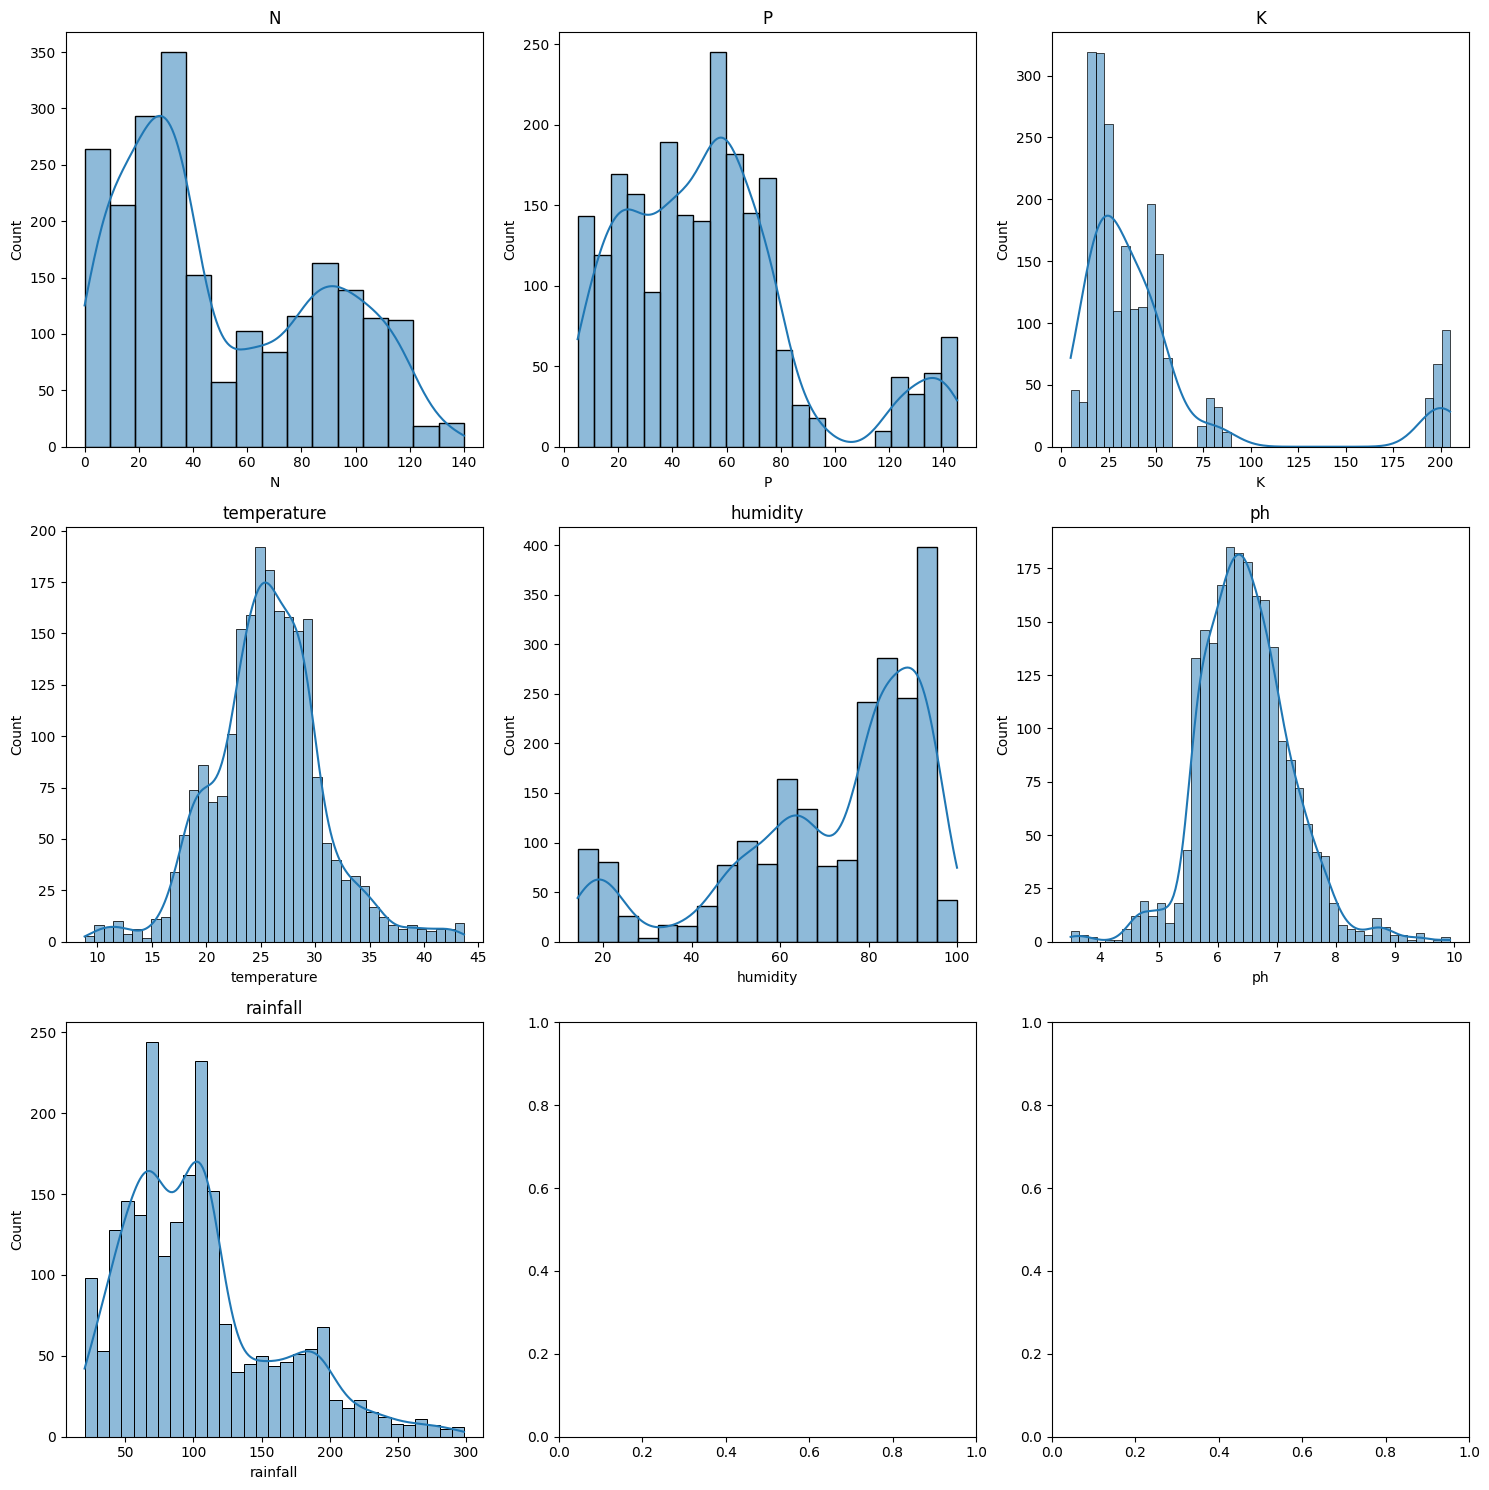

In [13]:
# Visualize the distribution of each feature

import seaborn as sns
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

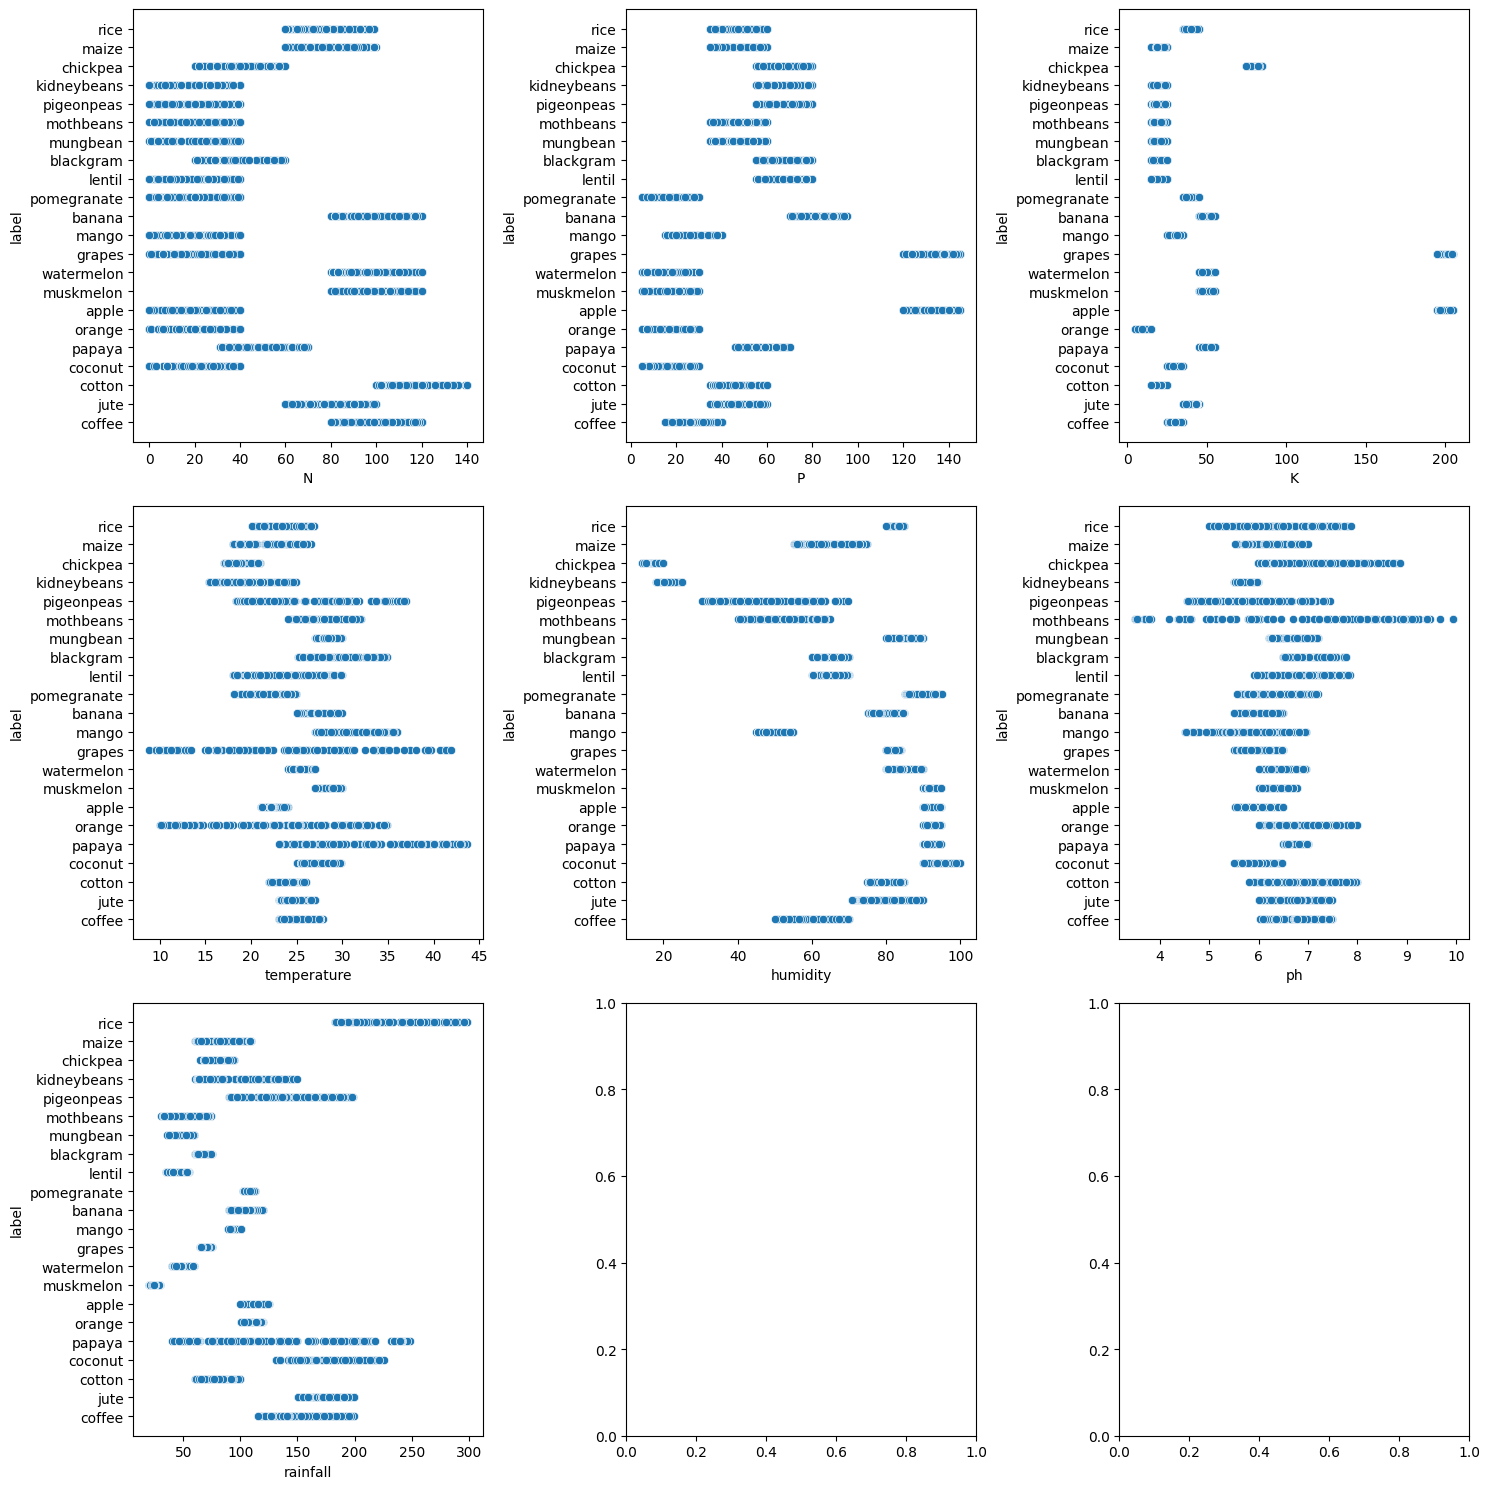

In [14]:
# Ploting scatter plot
import seaborn as sns
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
plt.tight_layout()
plt.show()

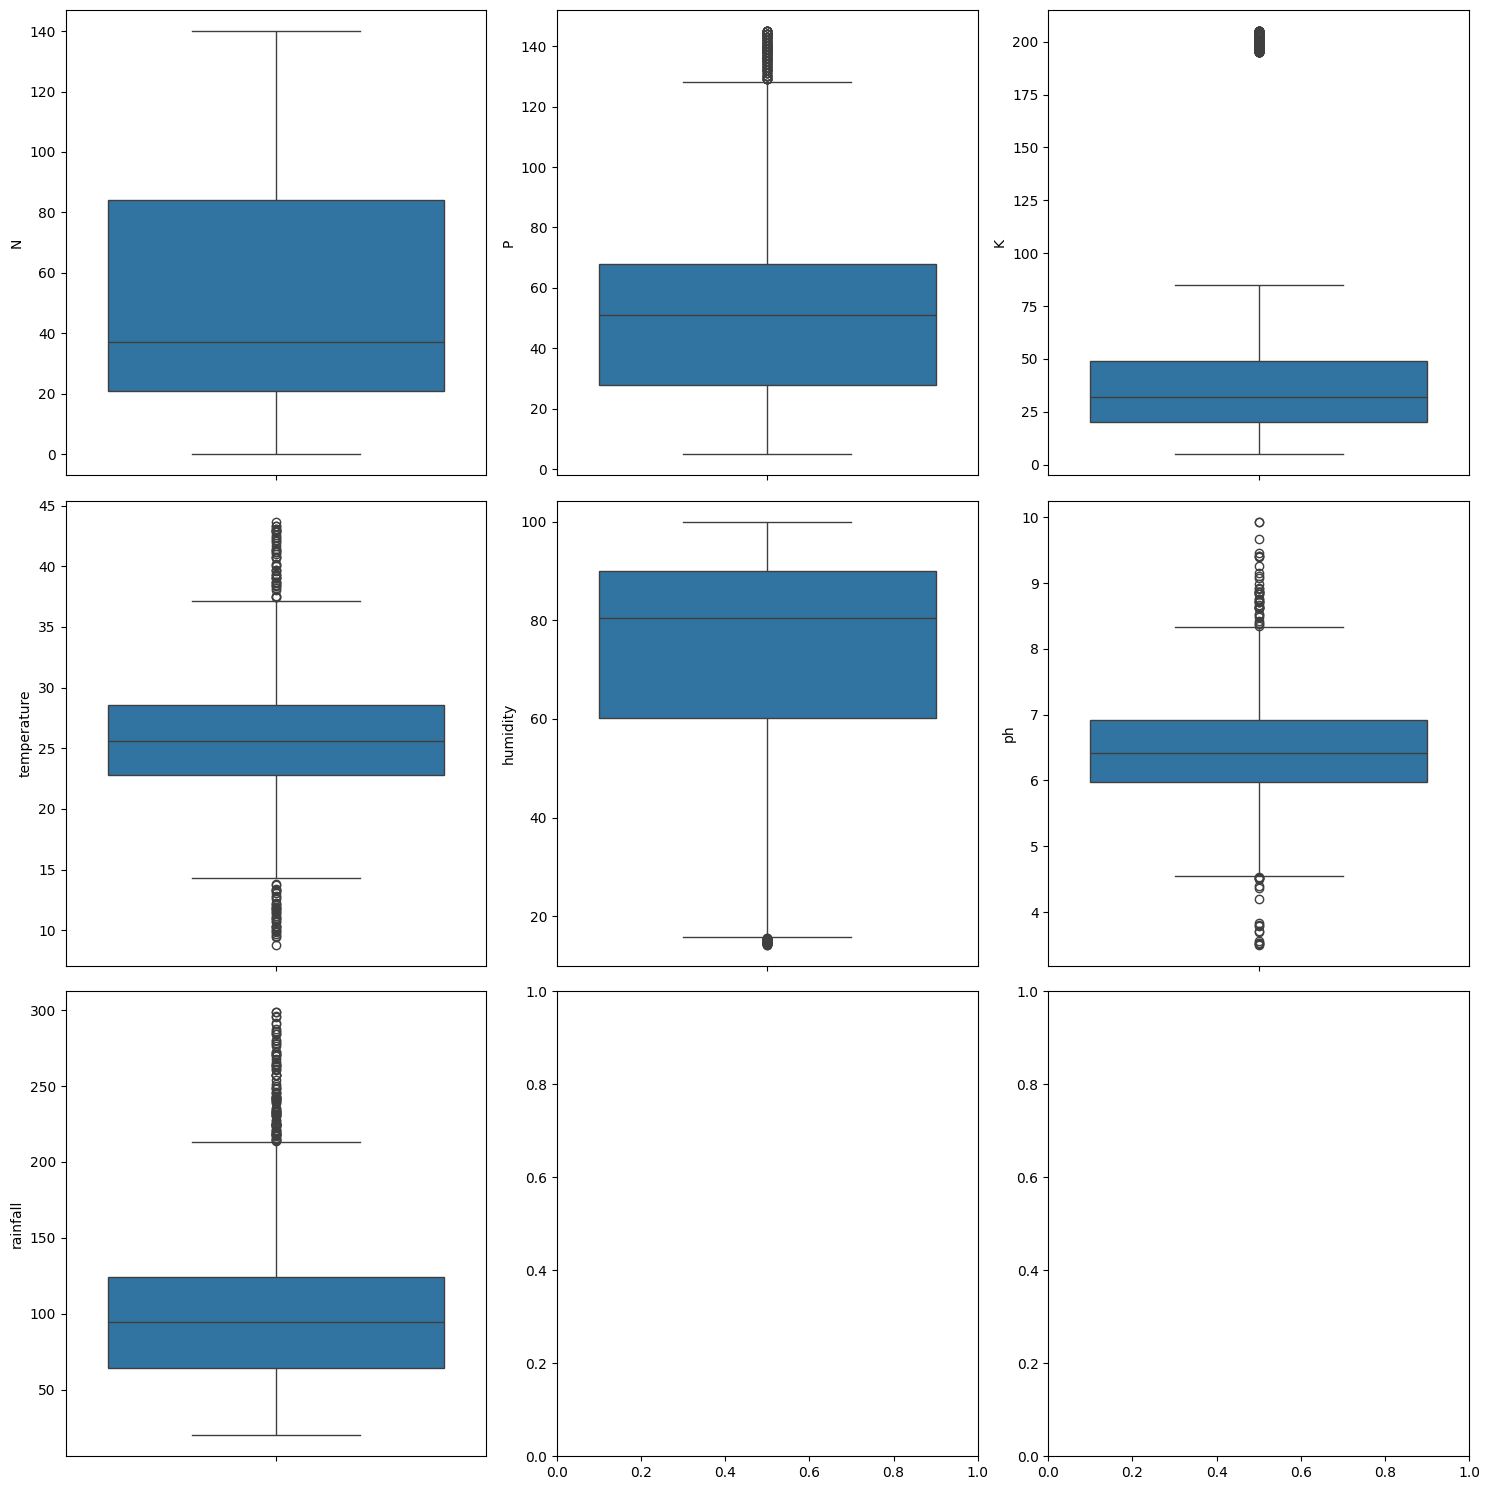

In [15]:
# Finding outliers - boxplot
fig, ax = plt.subplots(3,3, figsize=(15,15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()

In [16]:
# Correlation of the features
num_cols = crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [17]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


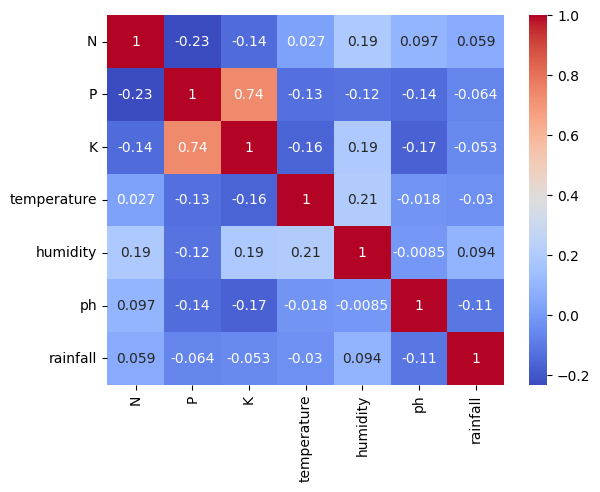

In [18]:
# Visualizing with Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

##ENCODING

In [19]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [34]:
crop_dict = {
    'rice': 0,
    'maize': 1,
    'chickpea': 2,
    'kidneybeans': 3,
    'pigeonpeas': 4,
    'mothbeans': 5,
    'mungbean': 6,
    'blackgram': 7,
    'lentil': 8,
    'pomegranate': 9,
    'banana': 10,
    'mango': 11,
    'grapes': 12,
    'watermelon': 13,
    'muskmelon': 14,
    'apple': 15,
    'orange': 16,
    'papaya': 17,
    'coconut': 18,
    'cotton': 19,
    'jute': 20,
    'coffee': 21
}

In [21]:
crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0.0


In [22]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,19.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,19.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,19.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,19.0
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,19.0


In [23]:
crop.drop('label', axis=1, inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,19.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,19.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,19.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,19.0
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,19.0


In [24]:
# Train Test Split
X = crop.drop('crop_no', axis=1)
y = crop['crop_no']

In [39]:
X = X[y.notna()]
y = y[y.notna()]

In [25]:
X.shape

(2200, 7)

In [26]:
y.shape

(2200,)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(1760, 7)

In [29]:
X_test.shape

(440, 7)

In [30]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
#Training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
import pandas as pd
y_train = y_train.reset_index(drop=True)

y_train = y_train.dropna()

X_train_scaled = X_train_scaled[y_train.index]

dt = RandomForestClassifier()
dt.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [42]:
import pandas as pd

if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test)

# Reset the index of y_test to match X_test_scaled
y_test = y_test.reset_index(drop=True)

# Remove rows with NaN values from y_test and corresponding rows from X_test_scaled
y_test = y_test.dropna()
X_test_scaled = X_test_scaled[y_test.index]

# Now you can calculate the accuracy score
y_pred = dt.predict(X_test_scaled)
acs = accuracy_score(y_test, y_pred)
print('accuracy score', acs)

accuracy score 0.04071246819338423


In [43]:
# accuracy is very low with RFC, using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
import pandas as pd
y_train = y_train.reset_index(drop=True)

y_train = y_train.dropna()

X_train_scaled = X_train_scaled[y_train.index]

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [45]:
import pandas as pd

if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test)

y_test = y_test.reset_index(drop=True)

y_test = y_test.dropna()
X_test_scaled = X_test_scaled[y_test.index]

y_pred = dt.predict(X_test_scaled)
acs = accuracy_score(y_test, y_pred)
print('accuracy score', acs)

accuracy score 0.05597964376590331


In [50]:
#Prediction
def crop_rec(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    transformed_features = scaler.transform(features)
    prediction = dt.predict(transformed_features).reshape(1, -1)
    crop_dict = {
    0: 'rice',
    1: 'maize',
    2: 'chickpea',
    3: 'kidneybeans',
    4: 'pigeonpeas',
    5: 'mothbeans',
    6: 'mungbean',
    7: 'blackgram',
    8: 'lentil',
    9: 'pomegranate',
    10: 'banana',
    11: 'mango',
    12: 'grapes',
    13: 'watermelon',
    14: 'muskmelon',
    15: 'apple',
    16: 'orange',
    17: 'papaya',
    18: 'coconut',
    19: 'cotton',
    20: 'jute',
    21: 'coffee'}
    # The prediction may contain float values, so convert them to integers
    crop = [crop_dict[int(i)] for i in prediction[0]]

    return f"{crop} is a best crop to grow in the farm"

In [51]:
# Predicting with the values
N = 90
P = 45
K = 43
temprature = 20
humidity = 82
ph = 6.1
rainfall = 200
crop_rec(N, P, K, temprature, humidity, ph, rainfall)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"['mango'] is a best crop to grow in the farm"

In [52]:
# Predicting with the values
N = 46
P = 45
K = 55
temprature = 27
humidity = 89
ph = 6.13
rainfall = 234
crop_rec(N, P, K, temprature, humidity, ph, rainfall)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"['blackgram'] is a best crop to grow in the farm"

##FERTILISER RECOMMENDATION

In [53]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [54]:
# load the dataset
fertilizer = pd.read_csv("/content/Fertilizer Prediction.csv")
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [55]:
# check the shape of the dataset
fertilizer.shape

(99, 9)

In [56]:
# check the basic info of the dataset
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [57]:
# check the missing values in the dataset
fertilizer.isnull().sum()

,0
Temparature,0
Humidity,0
Moisture,0
Soil Type,0
Crop Type,0
Nitrogen,0
Potassium,0
Phosphorous,0
Fertilizer Name,0


In [58]:
# check the duplicated values in the dataset
fertilizer.duplicated().sum()

0

In [59]:
# check the basic statistics of the dataset
fertilizer.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [60]:
# Only select the numerical columns
fertilizer_numeric = fertilizer.select_dtypes(include=[np.number])
corr = fertilizer_numeric.corr()
corr

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


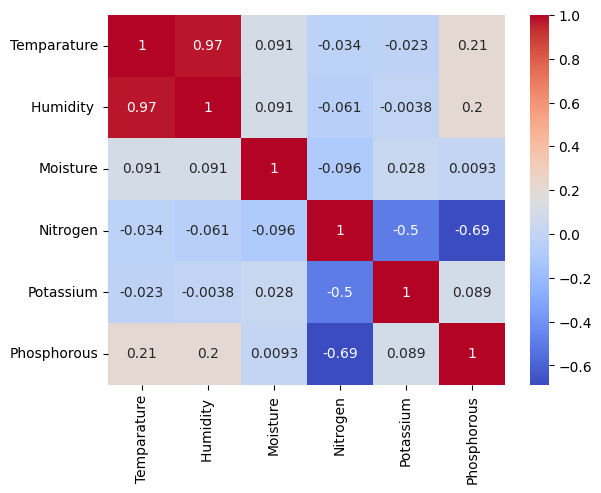

In [61]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.show()

In [62]:
fertilizer['Fertilizer Name'].value_counts()

,count
Fertilizer Name,
Urea,22
DAP,18
28-28,17
14-35-14,14
20-20,14
17-17-17,7
10-26-26,7


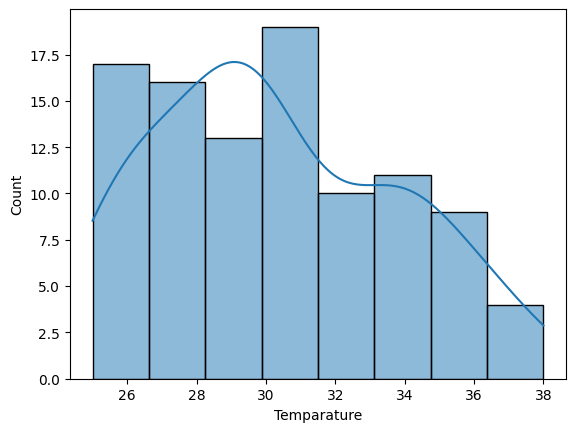

In [63]:
# check the distribution of the temperature column
sns.histplot(fertilizer['Temparature'], kde=True)
plt.show()

In [64]:
# Only select the numerical columns
features = fertilizer.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']


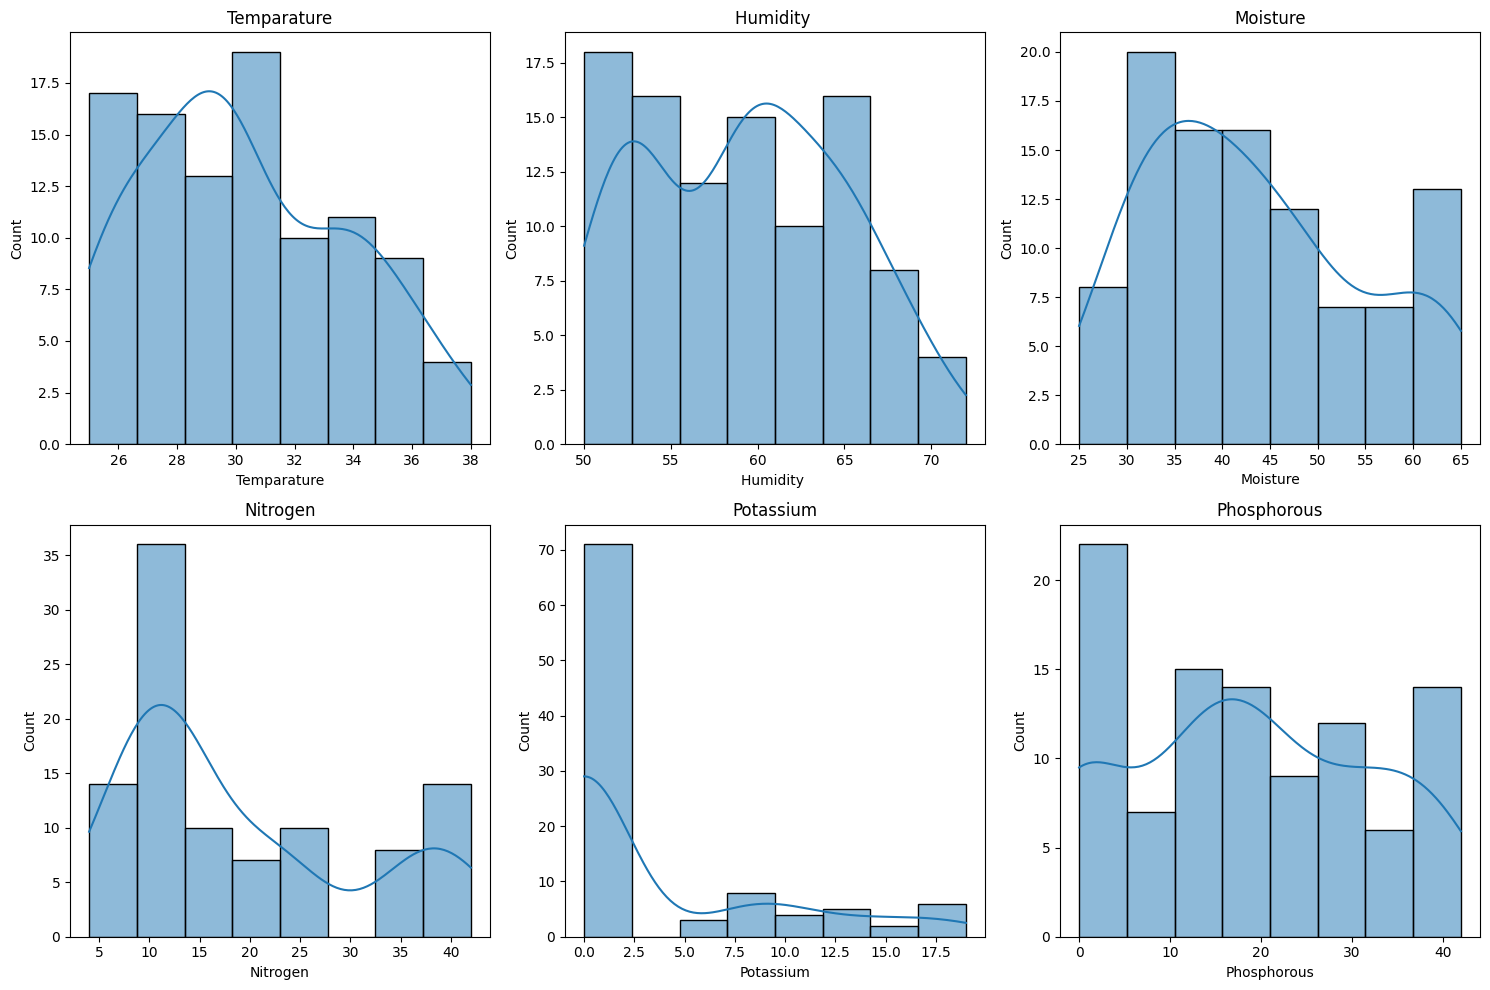

In [65]:
# visualize the distribution of each feature
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

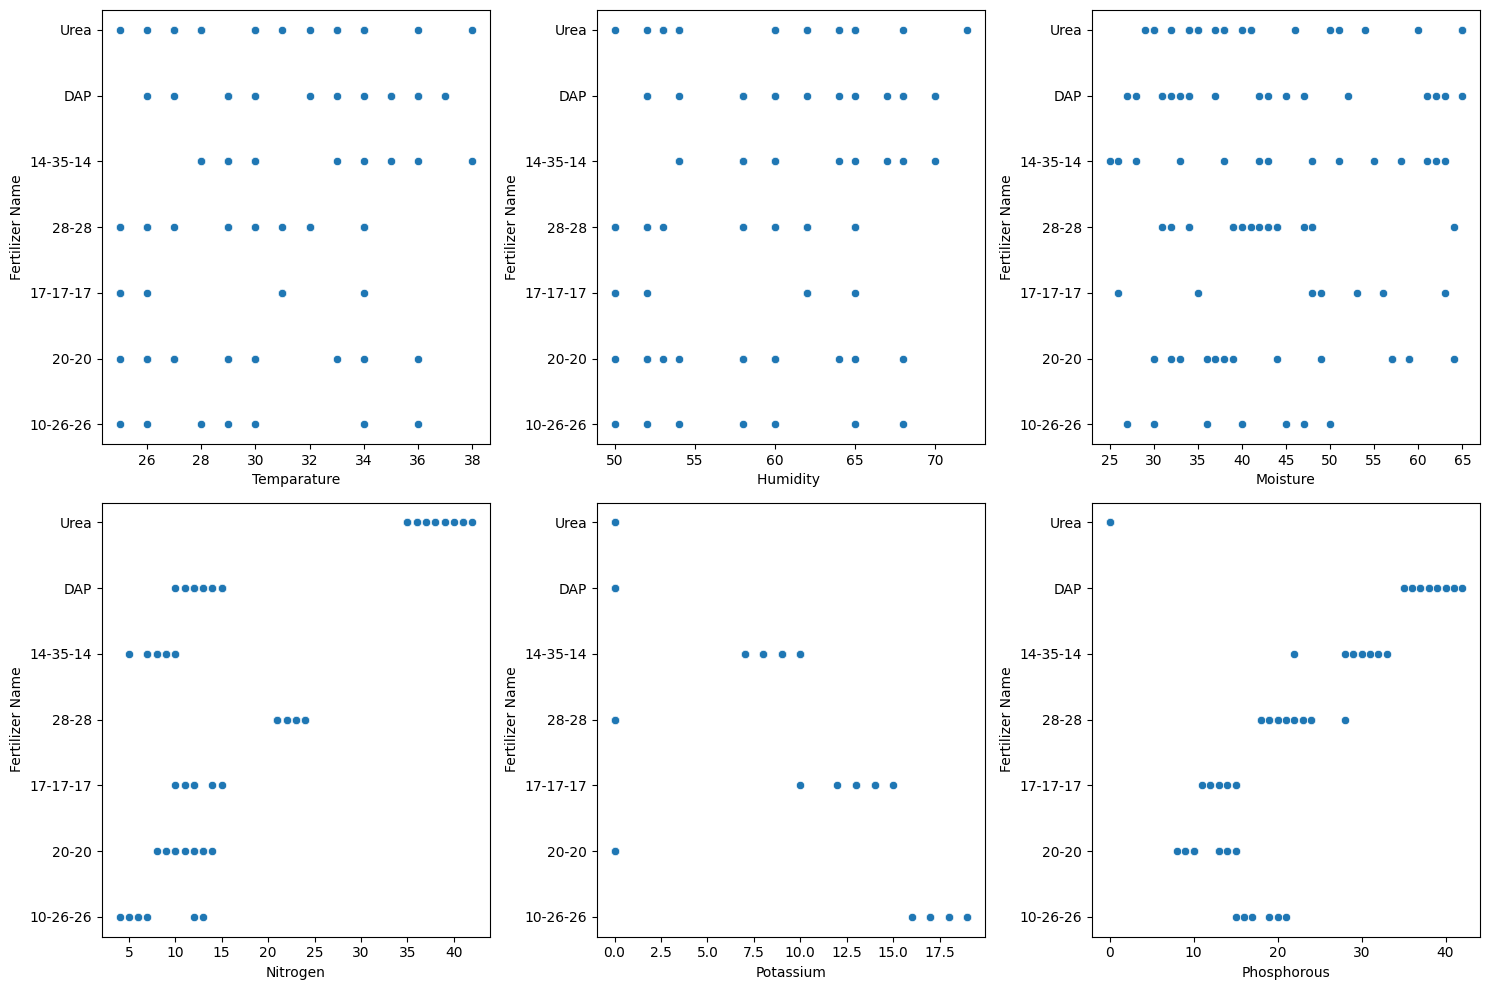

In [66]:
# plot scatter plot of each feature against the target
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='Fertilizer Name', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()


In [67]:
fert_dict = {
'Urea':1,
'DAP':2,
'14-35-14':3,
'28-28':4,
'17-17-17':5,
'20-20':6,
'10-26-26':7,
}

In [68]:
fertilizer['fert_no'] = fertilizer['Fertilizer Name'].map(fert_dict)

fertilizer['fert_no'].value_counts()

,count
fert_no,
1,22
2,18
4,17
3,14
6,14
5,7
7,7


In [69]:
# drop the target column with name and keep the target column with numbers
fertilizer.drop('Fertilizer Name',axis=1,inplace=True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [70]:
# Select the object columns
fertilizer.select_dtypes(include=['object']).columns

Index(['Soil Type', 'Crop Type'], dtype='object')

In [71]:
# convert the categorical columns to numerical columns using labelencoder
lb = LabelEncoder()
fertilizer["Soil Type"]=lb.fit_transform(fertilizer['Soil Type'])
fertilizer['Crop Type']=lb.fit_transform(fertilizer['Crop Type'])

In [72]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


In [73]:
# split the dataset into features and target
x = fertilizer.drop('fert_no',axis=1)
y = fertilizer['fert_no']
# print the shape of features and target
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")

The shape of features is: (99, 8)
The shape of target is: (99,)


In [74]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

# print the shape of training and testing sets
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


##SCALING

In [75]:
# Scale the features using StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [76]:
# insialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

In [77]:
# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [78]:
# evaluate the model on the test set and print the accuracy
accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 100.00%


In [79]:
# evaluate the model on the training set and print the accuracy
accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model on the training set is: {accuracy*100:.2f}%")

The accuracy of the model on the training set is: 100.00%


In [80]:
def recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = sc.transform(features)
    prediction = model.predict(transformed_features).reshape(1,-1)
    fert_dict = {1: 'Urea', 2: 'DAP', 3: '14-35-14', 4: '28-28', 5: '17-17-17', 6: '20-20', 7: '10-26-26'}
    fertilizer = [fert_dict[i] for i in prediction[0]]

    return f"{fertilizer} is a best fertilizer for the given conditions"

In [81]:
# Given input values
Temparature = 26
Humidity = 0.5
Moisture = 0.6
Soil_Type = 2
Crop_Type = 3
Nitrogen = 10
Potassium = 15
Phosphorous = 6

# Use the recommendation function to get a prediction
recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous)

"['17-17-17'] is a best fertilizer for the given conditions"